# Assignment 7 - EE18BTECH11050 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Ques 1. 

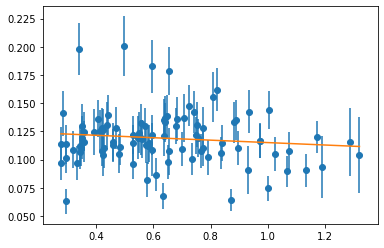

In [2]:
from scipy import optimize
import emcee

data = []      #z, fgas, fgas_error, ignore
with open("a7test.txt", 'r') as f:
    data = [i.replace("\n", "").split(" ") for i in f.readlines()[1:]]
    data = [[float(j) for j in i] for i in data]

z = np.array([i[0] for i in data])
fgas = np.array([i[1] for i in data])
fgas_error = np.array([i[2] for i in data])

def func(z, f0, f1):
    return f0*(1+f1*z)

(f0, f1), _ = optimize.curve_fit(func, z, fgas)

_z = np.linspace(np.min(z), np.max(z), 1000)
plt.errorbar(z, fgas, fgas_error, ls='none')
plt.scatter(z, fgas)
plt.plot(_z, [f0*(1+f1*i) for i in _z])
plt.show()

In [ ]:
def log_likelihood(theta, x, y, sigma_y):
    f0, f1 = theta
    sigma_sq = np.square(sigma_y)+np.square(f0*(1+f1*x))
    return -0.5*np.sum(np.square(y - f0*(1+f1*x))/sigma_sq+np.log(sigma_sq))
    
def minimiz(*args):
    return -log_likelihood(*args)
    
def log_prior(theta):
    f0, f1 = theta
    if 0<f0<0.5 and -0.5<f1<0.5:
        return 0.0
    return -np.inf
    
def log_probability(theta, x, y, sy):
    if np.isfinite(log_prior(theta)) == False:
        return -np.inf
    return log_prior(theta) + log_likelihood(theta, x, y, sy)

start = np.array([f0, f1]) + 0.1*np.random.randn(2)
result = optimize.minimize(minimiz, start, args=(z,fgas,fgas_error))
f0_mz, f1_mz = result.x

pos = result.x + 1e-4 * np.random.randn(40,2)
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(z,fgas,fgas_error))
sampler.run_mcmc(pos, 10000);

samlpes = sampler.get_chain(discard=100, thin=15, flat=True)
labels = ['f0', 'f1']
fig = corner.corner(samlpes, truths=[f0, f1], levels= (0.68, 0.9), labels=labels)

### Ques 2.

In [3]:
, progress=Trueimport nestle

data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])

x, y, sigma_y = data

def loglikelinear(theta):
    _y = theta[1] * x + theta[0]
    chisq = np.sum(((y - _y) / sigma_y)**2)
    return -chisq/2

def loglikequad(theta):
    _y = theta[2]*(x*2) + theta[1]*x + theta[0]
    chisq = np.sum(((y - _y) / sigma_y)**2)
    return -chisq/2

def prior_transform(x):
    return 10 * x - 5

result1 = nestle.sample(loglikelinear, prior_transform, 2)
result2 = nestle.sample(loglikequad, prior_transform, 3)

print(result2.logz, result1.logz)
print("It can be observed that the values agree with what is given on the blog")

-15.044218693870889 -14.597448497119823
It can be observed that the values agree with what is given on the blog


### Ques 3.

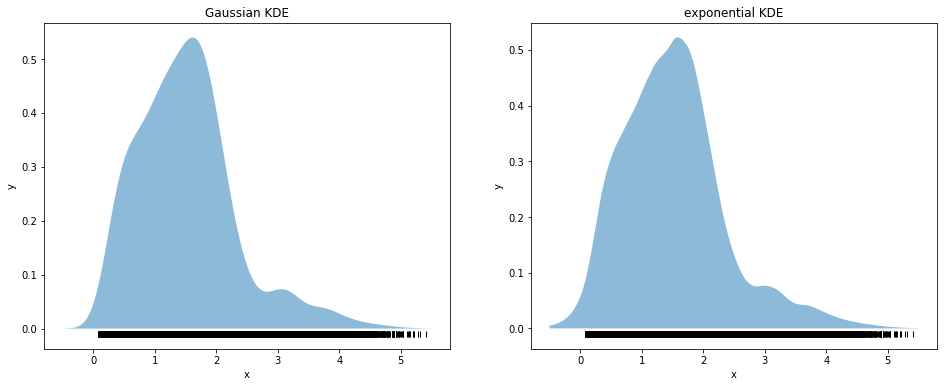

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KernelDensity


A=pd.read_csv("a7q3testfile.csv")
z = A['z']
x_d = np.linspace(-0.5,5.5,1000)

fig, ax = plt.subplots(1,2,figsize=(16, 6))

kde1 = KernelDensity(bandwidth=0.2, kernel='gaussian')
kde1.fit(z[:, None])
logprob = kde1.score_samples(x_d[:, None])
ax[0].fill_between(x_d, np.exp(logprob), alpha=0.5)
ax[0].plot(z, np.full_like(z, -0.01), '|k', markeredgewidth=1)
ax[0].set(title='Gaussian KDE',xlabel='x',ylabel='y')

kde2 = KernelDensity(bandwidth=0.2, kernel='exponential')
kde2.fit(z[:, None])
logprob = kde2.score_samples(x_d[:, None])
ax[1].fill_between(x_d, np.exp(logprob), alpha=0.5)
ax[1].plot(z, np.full_like(z, -0.01), '|k', markeredgewidth=1)
ax[1].set(title='exponential KDE',xlabel='x',ylabel='y')

plt.show()